# Linear Regression

In [1]:
#numpy, matplotlib, seaborn, pandas libraries were used here.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Dataset generation

In [2]:
N=60
m_slope=2
c_intercept=250 
random_x=np.linspace(0,300,N)
random_y=m_slope*random_x+c_intercept

#adding noise to the datasets such that mean=0 and standard deviation=0.5 of normal distribution.
mean=0
sigma=20
noise=np.random.normal(mean,sigma,random_y.shape)
Final_value=random_y+noise

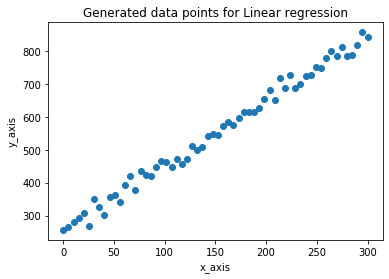

In [3]:
plt.scatter(random_x,Final_value)
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Generated data points for Linear regression')
plt.show()

## 1) Gradient descent method

### Applying Gradient descent

In [4]:
Learning_rate=0.00005
#Intializing weights tetha
theta_0=0
theta_1=0

#gradient descent algorithm for updated weights.
cost_value=[]
h=theta_1*random_x+theta_0
diff0=np.sum((h-Final_value))
diff1=np.sum((h-Final_value)*random_x)
t0=theta_0-((Learning_rate*diff0)/N)
t1=theta_1-((Learning_rate*diff1)/N)
theta_0=t0
theta_1=t1
cost=(np.sum((h-Final_value)**2)/(2*N))
cost_value.append(cost)
    
epochs=0
tmp=1
#weights are updated till the consecutive cost value is less than 10**-3.
while tmp>10**-3:
    h=theta_1*random_x+theta_0
    diff0=np.sum((h-Final_value))
    diff1=np.sum((h-Final_value)*random_x)
    t0=theta_0-((Learning_rate*diff0)/N)
    t1=theta_1-((Learning_rate*diff1)/N)
    theta_0=t0
    theta_1=t1
    cost=(np.sum((h-Final_value)**2)/(2*N))
    tmp=cost_value[len(cost_value)-1]-cost
    cost_value.append(cost)
    epochs+=1
    
print(t0,t1,epochs)

238.8777365078114 2.0580491171417425 209688


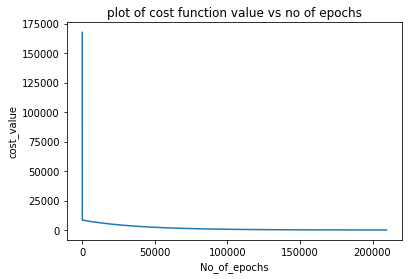

In [5]:
plt.plot(np.arange(epochs+1),np.array(cost_value))
plt.xlabel('No_of_epochs')
plt.ylabel('cost_value')
plt.title('plot of cost function value vs no of epochs')
plt.show()

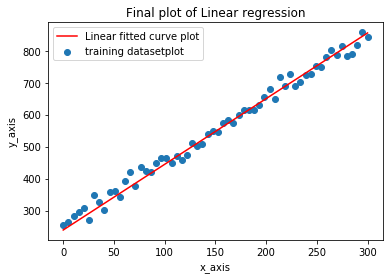

In [6]:
y_hat=theta_1*random_x+theta_0
plt.scatter(random_x,Final_value,label='training datasetplot')
plt.plot(random_x,y_hat,color='red',label='Linear fitted curve plot')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Final plot of Linear regression')
plt.legend()
plt.show()

In [7]:
print(theta_0,theta_1)

238.8777365078114 2.0580491171417425


In [8]:
print('The value of theta_0 is {} and theta_1 is {}'.format(theta_0,theta_1))

The value of theta_0 is 238.8777365078114 and theta_1 is 2.0580491171417425


## 2) Normal Equation method

In [9]:
def polynomial_curve_fitting(random_x,M):
    A=np.zeros((M+1,M+1))
    num=len(random_x)
    
    #This is the code to find of w(i).
    for i in range(M+1):
        for j in range(M+1):
            A[i,j]= sum([x**(i+j) for x in random_x ])
        
    B=np.zeros((M+1,1))
    for i in range(M+1):
        B[i]=sum([Final_value[j]*random_x[j]**i for j in range(num)])

    A_inverse=np.linalg.inv(A)
    w_values=np.matmul(A_inverse,B)
    
    return w_values

In [10]:
#This is the to find out the polynomial function.
def fn(x,w_values):
    function=0
    w=len(w_values)
    for k in range(w):
        function += w_values[k]*(x**k)
    return function

In [11]:
M=1
w_values=polynomial_curve_fitting(random_x,M)

In [12]:
#This code helps in calculating y_value for the found out polynomial function.
y_axis=[fn(x,w_values) for x in random_x]

plot of  the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points.

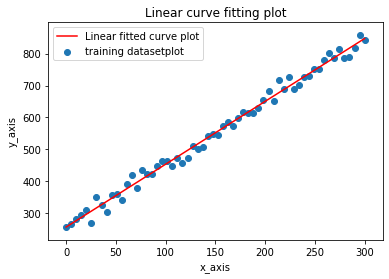

In [13]:
#This is Linear curve fitting plot.
plt.plot(random_x,y_axis,color='red',label='Linear fitted curve plot')
plt.scatter(random_x,Final_value,label='training datasetplot')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Linear curve fitting plot' )
plt.legend()
plt.show()

In [14]:
print('The theta values are given by {} and {}'.format(w_values[0][0],w_values[1][0]))

The theta values are given by 256.3260953851899 and 1.9715397142203168


## 3)Sklearn method

In [15]:
from sklearn.linear_model import LinearRegression
random_x=np.array(random_x).reshape((-1, 1))
Final_value=np.array(Final_value)

In [16]:
reg = LinearRegression().fit(random_x,Final_value)

In [17]:
intercept=reg.intercept_
print('intercept value is given by:', intercept )

intercept value is given by: 256.32609538518886


In [18]:
slope=reg.coef_[0]
print('slope value is given by:', slope) 

slope value is given by: 1.9715397142203201


### Observation

In [19]:
matrix=np.zeros((3,2))
matrix[0]=np.array([t0,t1])
matrix[1]=np.array([w_values[0][0],w_values[1][0]])
matrix[2]=np.array([intercept,slope])

In [20]:
df=pd.DataFrame(matrix,['Gradient decent method','Normal equation method','sklearn method'],['intercept','Slope'])
df

,intercept,Slope
Gradient decent method,238.877737,2.058049
Normal equation method,256.326095,1.971540
sklearn method,256.326095,1.971540
